In [9]:
import utils
from utils import *
# from resnet50 import *
# from keras.applications.resnet50 import *
from keras.applications.xception import *

from keras.preprocessing import image
from keras.preprocessing.image import *

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# from ImageDataGenerator_extended2 import *

from image_90rotations import *


%matplotlib inline
from sys import getsizeof
import seaborn as sns

In [2]:
target_size = (112,112)#(256, 256)

In [3]:
# K.set_image_data_format('channels_first')
K.image_data_format()

'channels_last'

### Load Data

In [4]:
x_train = []
y_train = []

df_train = pd.read_csv('data/train_v2.csv')
df_test = pd.read_csv('data/sample_submission_v2.csv')



labels = ['blow_down',
 'bare_ground',
 'conventional_mine',
 'blooming',
 'cultivation',
 'artisinal_mine',
 'haze',
 'primary',
 'slash_burn',
 'habitation',
 'clear',
 'road',
 'selective_logging',
 'partly_cloudy',
 'agriculture',
 'water',
 'cloudy']

label_map = {'agriculture': 14,
 'artisinal_mine': 5,
 'bare_ground': 1,
 'blooming': 3,
 'blow_down': 0,
 'clear': 10,
 'cloudy': 16,
 'conventional_mine': 2,
 'cultivation': 4,
 'habitation': 9,
 'haze': 6,
 'partly_cloudy': 13,
 'primary': 7,
 'road': 11,
 'selective_logging': 12,
 'slash_burn': 8,
 'water': 15}

### Load Training data

#### loading labels

In [5]:
# y_train = []

# for f, tags in tqdm_notebook(df_train.values, miniters=1000):
#     targets = np.zeros(17)
    
#     for t in tags.split(' '):
#         targets[label_map[t]] = 1 
        

#     y_train.append(targets)


In [11]:
# y_train = np.array(y_train, np.uint8)


#### images

In [95]:
x_train = np.zeros((df_train.shape[0],target_size[0],target_size[0],3)).astype(np.float32)

c = 0

## loading images the keras way
for f, tags in tqdm_notebook(df_train.values, miniters=1000):
    
    img = image.load_img('data/train-jpg/{}.jpg'.format(f), target_size=target_size)
    break
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    x_train[c] = x
    c +=1    



In [112]:
# t = image.img_to_array(X_train[15])
# plt.imshow(t)

In [7]:
# x_test = []

# for f, tags in tqdm(df_test.values, miniters=1000):
#     img = cv2.imread('data/test-jpg/{}.jpg'.format(f))
#     img =  cv2.cvtColor(cv2.resize(img, target_size), cv2.COLOR_BGR2RGB)   

#     x_test.append(cv2.resize(img, target_size))


# x_test  = np.array(x_test, np.float32) #/ 255.
# x_test = x_test.transpose((0, 3, 1, 2))

In [12]:

# save_array("data/cache/ytrain.dat",y_train)

# save_array("data/cache/xtrain_{}x{}.dat".format(target_size[0],target_size[0]),x_train)
save_array("data/cache/xtest_{}x{}.dat".format(target_size[0],target_size[0]),x_test)


In [26]:
x_train = load_array("data/cache/xtrain_{}x{}.dat".format(target_size[0],target_size[1]))
y_train = load_array("data/cache/ytrain.dat")



In [11]:
# x_train = x_train.transpose(0,3,1,2)

In [12]:
# x_test = load_array("data/cache/xtest_100x100.dat")


In [20]:
print(x_train.shape)
# print(x_test.shape)
print(y_train.shape)


(40479, 112, 112, 3)
(40479, 17)


#### Loading test  data

In [156]:
x_test = np.zeros((df_test.shape[0],target_size[0],target_size[0],3)).astype(np.float32)

# np.memmap("data/cache/xtest_{}x{}.memmapped".format(target_size[0],target_size[0]), dtype='float32', mode='w+', 
#                        shape=(df_test.shape[0],3,target_size[0],target_size[0]))

In [157]:
### Test data
c = 0
for f, tags in tqdm_notebook(df_test.values, miniters=1000):
    
    img = image.load_img('data/test-jpg/{}.jpg'.format(f), target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    x_test[c] = x
    c +=1
        


### Model Training 


In [6]:
xc = Xception(include_top=False, input_shape=(target_size[0],target_size[0],3))
# resnet = ResNet50(include_top=True, classes=17)

In [7]:
for layer in xc.layers:
    layer.trainable = False

In [68]:
# xc.summary()

In [53]:
xc.layers[-95].name

'block5_sepconv1'

In [10]:
for i in range(-95,0):
    # block14_sepconv1: -6
    # block5_sepconv1: -95
    xc.layers[i].trainable = True

In [13]:
x = Flatten()(xc.layers[-1].output)
# x = GlobalAveragePooling2D(name='avg_pool')(xc.layers[-1].output)
# 
x = Dropout(0.5)(x)

x = Dense(1024, activation='relu')(x)

# x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.3)(x)
x = Dense(17,activation='sigmoid',name="fc17")(x)
# x = Dense(4,activation='softmax',name="weatherx4")(x)



In [15]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 112, 112, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 55, 55, 32)    864         input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 55, 55, 32)    128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 55, 55, 32)    0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [16]:
model = Model(inputs=xc.input,outputs=x)
model.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.load_weights("weights/xception_17class_aug_toponly_ft_block5_sepconv1.h5")



#xception_17class_aug_toponly_ft_all

In [63]:
# for l in model.layers:
#     if l.trainable==True:
#         print( l.name)

### Quick training and prediction (on SAMPLE data)

In [17]:
VALIDATION_SPLIT = 0.2
np.random.seed(1)

# perm = np.random.permutation(len(x_sample))
# idx_train = perm[:int(len(x_sample)*(1-VALIDATION_SPLIT))]
# idx_val = perm[int(len(x_sample)*(1-VALIDATION_SPLIT)):]

# X_train = x_sample[idx_train]
# Y_train = y_sample[idx_train]
# X_valid = x_sample[idx_val]
# Y_valid = y_sample[idx_val]



perm = np.random.permutation(len(x_train))
idx_train = perm[:int(len(x_train)*(1-VALIDATION_SPLIT))]
idx_val = perm[int(len(x_train)*(1-VALIDATION_SPLIT)):]


X_train = x_train[idx_train]
Y_train = y_train[idx_train]
X_valid = x_train[idx_val]
Y_valid = y_train[idx_val]



In [25]:
del X_train

In [23]:
X_train.shape,Y_train.shape


((32383, 112, 112, 3), (32383, 17))

In [24]:
Y_valid.shape,X_valid.shape

((8096, 17), (8096, 3, 224, 224))

In [32]:
# plt.bar(np.arange(0,17),Y_train.sum(axis=0))


In [33]:
# plt.bar(np.arange(0,17),Y_valid.sum(axis=0))

In [34]:
# ratios = Y_valid.sum(axis=0).ravel()/ 1.0*Y_train.sum(axis=0).ravel()
# plt.bar(np.arange(17),1/ratios)

#### With Augmentation

In [27]:
batch_size = 128

# train_gen = ImageDataGenerator(rotation_range=359,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     channel_shift_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,fill_mode='reflect')

train_gen = ImageDataGenerator2(rotation_range=270,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    shear_range=0.1,
#     zoom_range=0.2,
    channel_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)


#image.ImageDataGenerator(
#Make sure to set shuffle to FALSE!! for pre-computations
# train_batch = train_gen.flow(X_train,[Y_train[:,weather_indices],Y_train[:,rare_class_indices]],
#                              batch_size=batch_size,shuffle=True)

train_batch = train_gen.flow(x_train,y_train,batch_size=batch_size,shuffle=True)

#verify augmentation results:
#,save_to_dir="data/tmp/aug_v1/",save_prefix="v1")

--- 


In [73]:
# model.summary()

In [28]:

kfold_weights_path = os.path.join('weights/', 'xception_17class_simpleaug_block5_sepconv1_alltrain.h5')


#              ReduceLROnPlateau(monitor='val_loss',  patience=3, verbose=1, factor=0.1, min_lr=1e-7)
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss',  patience=2, verbose=1, factor=0.5, min_lr=1e-6)
            ]



#### Results
....

best of no globa avg, flatten+1024 dense:
127/126 [==============================] - 133s - loss: 0.1433 - acc: 0.9450 - val_loss: 0.1269 - val_acc: 0.9517

no gavg, 1024 dense only, finetuning block14_sepconv1 (-6+):

253/252 [==============================] - 150s - loss: 0.1102 - acc: 0.9575 - val_loss: 0.1027 - val_acc: 0.9613

block5_sepconv1:

253/252 [==============================] - 254s - loss: 0.0928 - acc: 0.9644 - val_loss: 0.0963 - val_acc: 0.9640



xception_17class_simpleaug_block5_sepconv1:

Epoch 3/100
253/252 [==============================] - 255s - loss: 0.0844 - acc: 0.9669 - val_loss: 0.0924 - val_acc: 0.9652





all layers:
253/252 [==============================] - 393s - loss: 0.0882 - acc: 0.9661 - val_loss: 0.0957 - val_acc: 0.9644



gavgx512:
127/126 [==============================] - 122s - loss: 0.1742 - acc: 0.9346 - val_loss: 0.1697 - val_acc: 0.9402


In [29]:

history = model.fit_generator(train_batch, validation_data=(X_valid, Y_valid),
                               steps_per_epoch=len(x_train)/batch_size,epochs=2,callbacks=callbacks)




Epoch 1/2
317/316 [==============================] - 308s - loss: 0.0865 - acc: 0.9665 - val_loss: 0.0912 - val_acc: 0.9655
Epoch 2/2
317/316 [==============================] - 314s - loss: 0.0857 - acc: 0.9666 - val_loss: 0.0904 - val_acc: 0.9657


#### Finetuning top resnet layers (block 5c)

In [38]:
if os.path.isfile(kfold_weights_path):
    print ("loading best weights from '{}'".format(kfold_weights_path))
    model.load_weights(kfold_weights_path)
    
    

loading best weights from 'weights/xception_17class_simpleaug_block5_sepconv1_alltrain.h5'


In [84]:
X_valid.shape

(8096, 112, 112, 3)

In [30]:
def make_augmented_predictions(model,data,generator,num_aug):
    preds = np.zeros((data.shape[0],17)).astype(np.float32) #model.predict(data)
    
    for i in tqdm_notebook(range(num_aug)):
        partial_preds = []
        test_batch = train_gen.flow(data,batch_size=100,shuffle=False)
        partial_preds.append( model.predict_generator(test_batch,steps=data.shape[0]/100, verbose=1))
                             
        preds += np.vstack(partial_preds)
        
    return  preds/float(num_aug)

In [31]:
model.load_weights("weights/xception_17class_simpleaug_block5_sepconv1.h5")

In [32]:
# preds_val = make_augmented_rotations(model,X_valid)#model.predict(X_valid)
preds_val = make_augmented_predictions(model,X_valid,train_gen,10)

81/80 [==============================] - 26s    



In [33]:
save_array("data/cache/preds_val_xception_10x_simpleaug_block5_sepconv1.dat", preds_val)

In [34]:
def optimise_f2_thresholds2(y, p, verbose=True, resolution=100,num_classes=17):
    def mf(x):
        p2 = np.zeros_like(p)
        for i in range(num_classes):
            p2[:, i] = (p[:, i] > x[i]).astype(np.int)
        score = fbeta_score(y, p2, beta=2, average='samples')
        return score

    x = [0.1]*num_classes
    for i in range(num_classes):
        best_i2 = 0
        best_score = 0
        for i2 in range(resolution):
            threshold = float(i2) / resolution
            x[i] = threshold
            score = mf(x)
            if score > best_score:
                best_i2 = threshold
                best_score = score

        x[i] = best_i2
        if verbose:
            print(i, best_i2, best_score)

    return x


In [35]:
# thres = optimise_f2_thresholds2(Y_valid[:,rare_class_indices], preds_val[1],num_classes=17)
thres = optimise_f2_thresholds2(Y_valid, preds_val,num_classes=17)

np.mean(thres)

0 0.18 0.915938091466
1 0.19 0.916073139239
2 0.11 0.916084294376
3 0.2 0.916583679277
4 0.21 0.918374088013
5 0.14 0.918431472956
6 0.19 0.919135118622
7 0.21 0.919908136556
8 0.14 0.919963628709
9 0.2 0.921138756738
10 0.21 0.921604118378
11 0.24 0.922901933229
12 0.27 0.922971643732
13 0.12 0.923083759942
14 0.24 0.924490753763
15 0.22 0.926098588425


/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


16 0.15 0.926283841263


0.18941176470588236

##### Results
only top: ('F2 Score:', 0.90277204908226472)

17x classes 5b: ('F2 Score:', 0.92441155146612664)

17x classes 5a: ('F2 Score:', 0.92602459589916475)


#### Exception
best of exception:
F2 Score: 0.921121043237

with 4x flips on thresholds:
F2 Score: 0.923967972874

with 4x augmentation on thresholds:
F2 Score: 0.924676457478

with 12x threshold augmentation:
F2 Score: 0.925721614367


simple aug:
F2 Score: 0.926283841263

In [36]:
print('F2 Score:', f2_score(Y_valid, preds_val>thres)) #combined_val_preds

F2 Score: 0.926283841263


In [37]:
save_array("data/cache/xception_val_thres_simpleaug_block5_sepconv1.dat",thres)

#### Confusin matrix
weather seems to be performing bad, let's peak into detaisl

In [139]:
from sklearn.metrics import classification_report



In [151]:
print (classification_report(Y_valid.astype(bool),(preds_val>thres),
                            target_names=labels))

                   precision    recall  f1-score   support

        blow_down       0.56      0.24      0.33        21
      bare_ground       0.29      0.34      0.32       177
conventional_mine       0.57      0.62      0.59        21
         blooming       0.30      0.04      0.07        71
      cultivation       0.53      0.70      0.60       890
   artisinal_mine       0.83      0.88      0.86        68
             haze       0.59      0.80      0.68       547
          primary       0.97      1.00      0.98      7503
       slash_burn       0.67      0.04      0.08        47
       habitation       0.63      0.78      0.70       699
            clear       0.91      0.99      0.95      5674
             road       0.71      0.91      0.80      1547
selective_logging       0.27      0.56      0.36        59
    partly_cloudy       0.83      0.97      0.90      1460
      agriculture       0.72      0.95      0.82      2429
            water       0.70      0.87      0.77      1

### Making Prediction

In [165]:
def make_staged_predictions(model,num_parts, nb_aug=1):
    partial_preds = []

    data = x_test#load_array("data/cache/xtest_{}x{}.dat".format(target_size[0],target_size[0]))

    chunck_size = int(len(data)/num_parts)

    print ("data has shape: ", data.shape)
    print ("breaking data into chunks of ", chunck_size)
    
    
    augmented_predictions = np.zeros((data.shape[0],17)).astype(np.float16)

    for n in range(nb_aug):
        print ("augmentation round {} of {}".format(n+1,nb_aug)) 
        partial_preds = []
        batch_size = 128.0

        for i in range(1,num_parts+2):
            print( "predicting part {} of {}".format(i,num_parts)      )

            start_index = (i-1)*chunck_size
            end_index = min(len(data),i*chunck_size)
            num_items = end_index-start_index
            
            test_batch = train_gen.flow(data[start_index:end_index],batch_size=int(batch_size),shuffle=False)
            pp = model.predict_generator(test_batch,steps=math.ceil(num_items/batch_size), verbose=1)

            print ("items needed vs. items generated: ",num_items,len(pp) )
            
            partial_preds.append(pp)


        augmented_predictions += np.vstack(partial_preds)

    augmented_predictions /= (nb_aug) 
    return augmented_predictions

    


In [166]:
test_preds_x12 = make_staged_predictions(model,num_parts=5,nb_aug=12)


data has shape:  (61191, 112, 112, 3)
breaking data into chunks of  12238
augmentation round 1 of 12
predicting part 1 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 2 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 3 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 4 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 5 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 6 of 5
1/1 [==============================] - 0s
items needed vs. items generated:  1 1
augmentation round 2 of 12
predicting part 1 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 2 of 5
96/96 [========================

96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 3 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 4 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 5 of 5
96/96 [==============================] - 40s    
items needed vs. items generated:  12238 12238
predicting part 6 of 5
1/1 [==============================] - 0s
items needed vs. items generated:  1 1


In [40]:
def read_partial_xtest(start,end):
    c = 0
    num_items = end-start
    x_test = np.zeros((num_items,target_size[0],target_size[0],3)).astype(np.float32)

    for f, tags in tqdm_notebook(df_test.iloc[start:end].values, miniters=1000):

        img = image.load_img('data/test-jpg/{}.jpg'.format(f), target_size=target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        x_test[c] = x
        c +=1

    return x_test


In [39]:

def make_staged_predictions_v2(model,num_parts, nb_aug=1):
    partial_preds = []

    batch_size = 128.0
    data_length = df_test.shape[0]#X_valid[0:16].shape[0]
    chunck_size = data_length//num_parts

    print( "breaking data into chunks of ", chunck_size)
    
#     ipdb.set_trace()
    final_preds = np.zeros((data_length,17)).astype(np.float32)
#     data = X_valid[0:16]


    for i in tqdm_notebook(range(1,num_parts+2)):
        print( "predicting part {} of {}".format(i,num_parts)      )

        start_index = (i-1)*chunck_size
        end_index = min(data_length,i*chunck_size)
        num_items = end_index-start_index
        data = read_partial_xtest(start_index,end_index)
        partials = []
        
        
        for n in tqdm_notebook(range(nb_aug)):
            print ("augmentation round {} of {}".format(n+1,nb_aug) )
#             partial_preds = np.zeros((num_items,17)).astype(np.float32)

            test_batch = train_gen.flow(data,batch_size=int(batch_size),shuffle=False)
            t = model.predict_generator(test_batch,steps=math.ceil(num_items/batch_size), verbose=1)[:num_items]

            partials.append(t)
#             partial_preds += t 
#         partial_preds /= float(nb_aug) 
            
        final_preds[start_index:end_index] = np.mean(partials,axis=0)
        save_array("data/cache/resnet_ft4a_final_preds_temp_part{}".format(i),final_preds)   
    
    return final_preds

    


In [41]:
preds_x10 = make_staged_predictions_v2(model,num_parts=5,nb_aug=10)


breaking data into chunks of  12238


predicting part 1 of 5


augmentation round 1 of 10
96/96 [==============================] - 39s    
augmentation round 2 of 10
96/96 [==============================] - 39s    
augmentation round 3 of 10
96/96 [==============================] - 39s    
augmentation round 4 of 10
96/96 [==============================] - 39s    
augmentation round 5 of 10
96/96 [==============================] - 39s    
augmentation round 6 of 10
96/96 [==============================] - 39s    
augmentation round 7 of 10
96/96 [==============================] - 39s    
augmentation round 8 of 10
96/96 [==============================] - 39s    
augmentation round 9 of 10
96/96 [==============================] - 39s    
augmentation round 10 of 10
96/96 [==============================] - 39s    
predicting part 2 of 5


augmentation round 1 of 10
96/96 [==============================] - 39s    
augmentation round 2 of 10
96/96 [==============================] - 39s    
augmentation round 3 of 10
96/96 [==============================] - 39s    
augmentation round 4 of 10
96/96 [==============================] - 39s    
augmentation round 5 of 10
96/96 [==============================] - 39s    
augmentation round 6 of 10
96/96 [==============================] - 39s    
augmentation round 7 of 10
96/96 [==============================] - 39s    
augmentation round 8 of 10
96/96 [==============================] - 39s    
augmentation round 9 of 10
96/96 [==============================] - 39s    
augmentation round 10 of 10
96/96 [==============================] - 39s    
predicting part 3 of 5


augmentation round 1 of 10
96/96 [==============================] - 39s    
augmentation round 2 of 10
96/96 [==============================] - 39s    
augmentation round 3 of 10
96/96 [==============================] - 39s    
augmentation round 4 of 10
96/96 [==============================] - 39s    
augmentation round 5 of 10
96/96 [==============================] - 39s    
augmentation round 6 of 10
96/96 [==============================] - 39s    
augmentation round 7 of 10
96/96 [==============================] - 39s    
augmentation round 8 of 10
96/96 [==============================] - 39s    
augmentation round 9 of 10
96/96 [==============================] - 39s    
augmentation round 10 of 10
96/96 [==============================] - 39s    
predicting part 4 of 5


augmentation round 1 of 10
96/96 [==============================] - 39s    
augmentation round 2 of 10
96/96 [==============================] - 39s    
augmentation round 3 of 10
96/96 [==============================] - 39s    
augmentation round 4 of 10
96/96 [==============================] - 39s    
augmentation round 5 of 10
96/96 [==============================] - 39s    
augmentation round 6 of 10
96/96 [==============================] - 39s    
augmentation round 7 of 10
96/96 [==============================] - 39s    
augmentation round 8 of 10
96/96 [==============================] - 39s    
augmentation round 9 of 10
96/96 [==============================] - 39s    
augmentation round 10 of 10
96/96 [==============================] - 39s    
predicting part 5 of 5


augmentation round 1 of 10
96/96 [==============================] - 39s    
augmentation round 2 of 10
96/96 [==============================] - 39s    
augmentation round 3 of 10
96/96 [==============================] - 39s    
augmentation round 4 of 10
96/96 [==============================] - 39s    
augmentation round 5 of 10
96/96 [==============================] - 39s    
augmentation round 6 of 10
96/96 [==============================] - 39s    
augmentation round 7 of 10
96/96 [==============================] - 39s    
augmentation round 8 of 10
96/96 [==============================] - 39s    
augmentation round 9 of 10
96/96 [==============================] - 39s    
augmentation round 10 of 10
96/96 [==============================] - 39s    
predicting part 6 of 5


augmentation round 1 of 10
1/1 [==============================] - 0s
augmentation round 2 of 10
1/1 [==============================] - 0s
augmentation round 3 of 10
1/1 [==============================] - 0s
augmentation round 4 of 10
1/1 [==============================] - 0s
augmentation round 5 of 10
1/1 [==============================] - 0s
augmentation round 6 of 10
1/1 [==============================] - 0s
augmentation round 7 of 10
1/1 [==============================] - 0s
augmentation round 8 of 10
1/1 [==============================] - 0s
augmentation round 9 of 10
1/1 [==============================] - 0s
augmentation round 10 of 10
1/1 [==============================] - 0s



In [43]:
save_array("data/cache/preds_xception_10xtta_simpleaug_block5_sepconv1.dat", preds_x10)

### Make submission

In [44]:
preds = preds_x10

In [169]:
preds.shape,

((61191, 17),)

In [67]:
result.describe()

,blow_down,bare_ground,conventional_mine,blooming,cultivation,artisinal_mine,haze,primary,slash_burn,habitation,clear,road,selective_logging,partly_cloudy,agriculture,water,cloudy
count,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04,6.119100e+04
mean,2.092521e-03,2.002436e-02,1.705570e-03,8.197919e-03,1.090433e-01,8.069404e-03,6.511531e-02,9.264554e-01,4.629843e-03,8.737222e-02,7.026423e-01,1.955193e-01,7.903736e-03,1.780910e-01,3.015021e-01,1.810035e-01,5.450794e-02
std,1.711922e-02,6.309157e-02,2.578361e-02,2.468580e-02,1.883690e-01,7.518498e-02,1.839076e-01,2.161390e-01,1.358226e-02,1.979453e-01,4.161497e-01,3.189357e-01,3.809143e-02,3.518260e-01,3.797856e-01,3.033955e-01,1.978504e-01
min,1.989812e-33,3.084237e-18,0.000000e+00,1.720035e-31,9.806460e-13,1.733163e-28,5.666915e-09,1.048582e-07,3.972161e-33,2.558184e-16,5.428992e-11,9.391141e-10,8.967547e-34,1.849209e-11,5.037108e-09,1.091683e-07,6.600514e-22
25%,1.586751e-06,3.634284e-05,1.340976e-14,5.397907e-06,1.312810e-03,1.210100e-13,7.467002e-05,9.930852e-01,2.720192e-07,4.781749e-04,2.057839e-01,1.919251e-03,6.012862e-05,4.728030e-04,4.398262e-03,3.431767e-03,8.820976e-09
50%,6.940718e-05,7.614807e-04,3.837159e-09,5.952732e-04,1.140785e-02,3.523986e-08,8.004202e-04,9.999110e-01,9.904186e-06,3.392098e-03,9.871269e-01,1.483807e-02,4.046766e-04,2.300348e-03,4.544344e-02,3.007554e-02,2.430257e-07
75%,5.729607e-04,1.467949e-02,7.067060e-06,4.621337e-03,1.426638e-01,2.460493e-05,1.232762e-02,9.999980e-01,1.762077e-03,5.850836e-02,9.988987e-01,2.341984e-01,2.508169e-03,3.815980e-02,6.377252e-01,1.728460e-01,4.029883e-05
max,7.787656e-01,9.923960e-01,9.717264e-01,4.659665e-01,9.872688e-01,9.998101e-01,9.949881e-01,1.000000e+00,1.968941e-01,9.999990e-01,1.000000e+00,9.999694e-01,8.963495e-01,9.999981e-01,9.999729e-01,9.999996e-01,9.999998e-01


In [45]:
result = pd.DataFrame(preds, columns = labels)
result.head(1)

,blow_down,bare_ground,conventional_mine,blooming,cultivation,artisinal_mine,haze,primary,slash_burn,habitation,clear,road,selective_logging,partly_cloudy,agriculture,water,cloudy
0,0.000292,0.000122,2.547367e-13,0.056835,0.002548,1.384223e-12,0.009852,0.999992,0.000005,0.002071,0.989911,0.002685,0.005869,0.000878,0.005151,0.002816,7.485456e-07


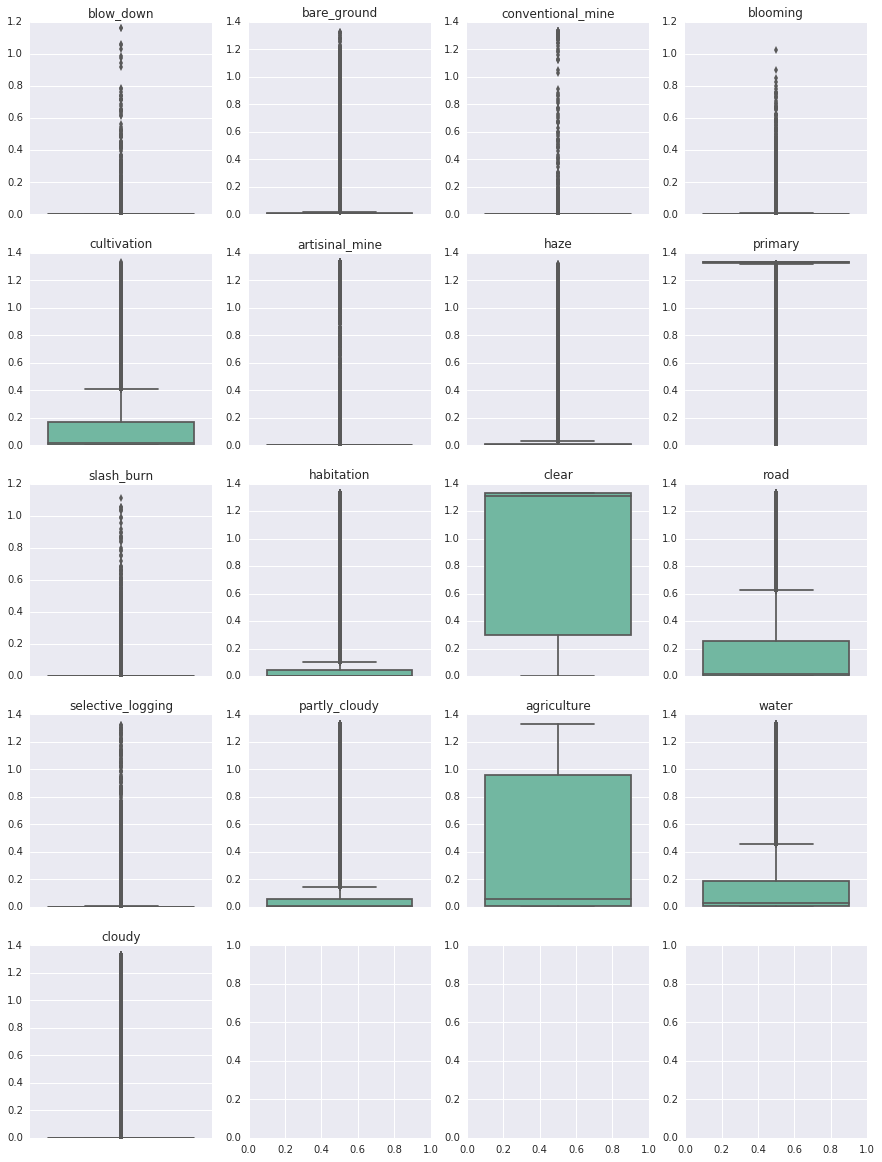

In [83]:
import seaborn as sns
tags_pred = np.array(preds).T
_, axs = plt.subplots(5, 4, figsize=(15, 20))
axs = axs.ravel()

for i, tag_vals in enumerate(tags_pred):
    sns.boxplot(tag_vals, orient='v', palette='Set2', ax=axs[i]).set_title(labels[i])


In [46]:
label_preds = []
for i in tqdm_notebook(range(result.shape[0]), miniters=1000):
    a = result.ix[[i]]
    a = a.apply(lambda x: x > thres, axis=1)
    a = a.transpose()
    a = a.loc[a[i] == True]
    ' '.join(list(a.index))
    label_preds.append(' '.join(list(a.index)))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df_test["tags"] = label_preds
df_test.head()

,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,primary partly_cloudy
3,test_3,primary clear partly_cloudy agriculture
4,test_4,primary partly_cloudy cloudy


In [177]:
# df_test.head(100)

In [48]:
submission_file = 'xception_full_112x112_fullnetft_10xtta.csv'
df_test.to_csv(submission_file, index=False)
FileLink(submission_file)

/home/ubuntu/planet/xception_full_112x112_fullnetft_10xtta.csv

In [49]:
y_test = []

for f, tags in tqdm_notebook(df_test.values, miniters=1000):
    targets = np.zeros(17)
    
    for t in tags.split(' '):
        targets[label_map[t]] = 1 
        

    y_test.append(targets)

In [51]:
label_map["cloudy"]

16

In [55]:
y_test = np.array(y_test).astype(np.uint8)

In [65]:
        len(np.where(y_test[:,16]>0)[0])

4732

In [61]:
y_test[np.where(y_test[:,16]>0)].sum(axis=0)

array([   0,    1,    0,    0,    0,    3, 1208, 2163,    0,    0,  681,   38,    0,  826,  220,
        912, 4732], dtype=uint64)

In [78]:
np.where(preds[:,16]>0.95)[0].shape

(1270,)

In [74]:
preds[np.where(preds[:,16]>0.95)[0]].max(axis=0)

array([  3.9455e-08,   6.6249e-04,   1.0273e-07,   4.2026e-08,   3.2741e-03,   2.7178e-07,
         7.3673e-02,   5.8437e-02,   3.6184e-08,   5.2794e-04,   1.1352e-02,   1.6093e-02,
         1.5806e-08,   7.1293e-02,   2.8064e-02,   3.6635e-02,   1.0000e+00], dtype=float32)